# OCR

In [1]:
import requests
from io import BytesIO
from PIL import Image

In [2]:
subscription_key = 'subscription_key'

In [3]:
vision_base_url = 'https://daegu0001.cognitiveservices.azure.com/vision/v2.0/'

In [4]:
ocr_url = vision_base_url + 'ocr'

In [5]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png'

![sample](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png)

In [7]:
image = Image.open(BytesIO(requests.get(image_url).content))

In [9]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'language': 'unk', # unknown, auto-detect
    'detectOrientation': 'true' # 방향 자동 인식
}
data = {'url': image_url}

지원하는 언어목록

- unk (AutoDetect)
- zh-Hans (ChineseSimplified)
- zh-Hant (ChineseTraditional)
- cs (Czech)
- da (Danish)
- nl (Dutch)
- en (English)
- fi (Finnish)
- fr (French)
- de (German)
- el (Greek)
- hu (Hungarian)
- it (Italian)
- ja (Japanese)
- ko (Korean)
- nb (Norwegian)
- pl (Polish)
- pt (Portuguese,
- ru (Russian)
- es (Spanish)
- sv (Swedish)
- tr (Turkish)
- ar (Arabic)
- ro (Romanian)
- sr-Cyrl (SerbianCyrillic)
- sr-Latn (SerbianLatin)
- sk (Slovak)

In [10]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)

In [13]:
analysis = response.json()

In [15]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '21,16,304,451',
   'lines': [{'boundingBox': '28,16,288,41',
     'words': [{'boundingBox': '28,16,288,41', 'text': 'NOTHING'}]},
    {'boundingBox': '27,66,283,52',
     'words': [{'boundingBox': '27,66,283,52', 'text': 'EXISTS'}]},
    {'boundingBox': '27,128,292,49',
     'words': [{'boundingBox': '27,128,292,49', 'text': 'EXCEPT'}]},
    {'boundingBox': '24,188,292,54',
     'words': [{'boundingBox': '24,188,292,54', 'text': 'ATOMS'}]},
    {'boundingBox': '22,253,297,32',
     'words': [{'boundingBox': '22,253,105,32', 'text': 'AND'},
      {'boundingBox': '144,253,175,32', 'text': 'EMPTY'}]},
    {'boundingBox': '21,298,304,60',
     'words': [{'boundingBox': '21,298,304,60', 'text': 'SPACE.'}]},
    {'boundingBox': '26,387,294,37',
     'words': [{'boundingBox': '26,387,210,37', 'text': 'Everything'},
      {'boundingBox': '249,389,71,27', 'text': 'else'}]},
    {'boundingBox': '127,431,198

In [18]:
line_infos = [region['lines'] for region in analysis['regions']]
word_infos = []

for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata['words']:
            word_infos.append(word_info)
            
word_infos

[{'boundingBox': '28,16,288,41', 'text': 'NOTHING'},
 {'boundingBox': '27,66,283,52', 'text': 'EXISTS'},
 {'boundingBox': '27,128,292,49', 'text': 'EXCEPT'},
 {'boundingBox': '24,188,292,54', 'text': 'ATOMS'},
 {'boundingBox': '22,253,105,32', 'text': 'AND'},
 {'boundingBox': '144,253,175,32', 'text': 'EMPTY'},
 {'boundingBox': '21,298,304,60', 'text': 'SPACE.'},
 {'boundingBox': '26,387,210,37', 'text': 'Everything'},
 {'boundingBox': '249,389,71,27', 'text': 'else'},
 {'boundingBox': '127,431,31,29', 'text': 'is'},
 {'boundingBox': '172,431,153,36', 'text': 'opinion.'}]

In [19]:
import matplotlib.pyplot as plt # 별명 짓기 (as)

(-0.5, 337.5, 478.5, -0.5)

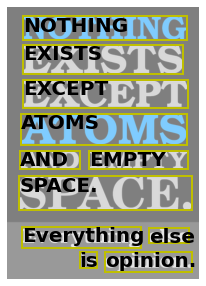

In [22]:
plt.figure(figsize=(5,5))
image = Image.open(BytesIO(requests.get(image_url).content))

ax = plt.imshow(image, alpha=0.5)

for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = plt.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
    
plt.axis("off")

In [23]:
korean_url = 'https://www.unikorea.go.kr/unikorea/common/images/content/peace.png'

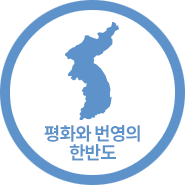

In [24]:
korean_image = Image.open(BytesIO(requests.get(korean_url).content))
korean_image

In [26]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'language': 'ko',
    'detectOrientation': 'true' # 방향 자동 인식
}
data = {'url': korean_url}

In [27]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)

In [28]:
analysis = response.json()

In [29]:
analysis

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [30]:
line_infos = [region['lines'] for region in analysis['regions']]
word_infos = []

for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata['words']:
            word_infos.append(word_info)
            
word_infos

[{'boundingBox': '45,125,46,17', 'text': '평화와'},
 {'boundingBox': '95,125,45,17', 'text': '번영의'},
 {'boundingBox': '70,144,46,17', 'text': '한반도'}]